In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
project_path='/content/drive/My Drive/Capstone_Project/Data'
os.chdir(project_path)

In [0]:
project_path

'/content/drive/My Drive/Capstone_Project/Data'

In [0]:
!pwd

/content/drive/My Drive/Capstone_Project/Data


In [0]:
!ls

'GCP Credits Request Link - RSNA.txt'   stage_2_test_images
 MetaData_information.csv	        stage_2_train_images
 stage_2_detailed_class_info.csv        stage_2_train_labels.csv
 stage_2_sample_submission.csv


# Understanding the data

In [0]:
import pandas as pd
dataframe1=pd.read_csv("stage_2_detailed_class_info.csv")
dataframe2=pd.read_csv("stage_2_train_labels.csv")

In [0]:
dataframe1

,patientId,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity
...,...,...
30222,c1ec14ff-f6d7-4b38-b0cb-fe07041cbdc8,Lung Opacity
30223,c1edf42b-5958-47ff-a1e7-4f23d99583ba,Normal
30224,c1f6b555-2eb1-4231-98f6-50a963976431,Normal
30225,c1f7889a-9ea9-4acb-b64c-b737c929599a,Lung Opacity


In [0]:
print('The shape of the dataframe1                :', dataframe1.shape)
print('The no.of rows in th dataframe1            :', len(dataframe1.index))
print('The no.of columns in the dataframe1        :', len(dataframe1.columns))

The shape of the dataframe1                : (30227, 2)
The no.of rows in th dataframe1            : 30227
The no.of columns in the dataframe1        : 2


In [0]:
dataframe1.info() #Information about dataframe1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30227 entries, 0 to 30226
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   patientId  30227 non-null  object
 1   class      30227 non-null  object
dtypes: object(2)
memory usage: 472.4+ KB


In [0]:
dataframe1.isnull().sum()  #Checking for null values

patientId    0
class        0
dtype: int64

In [0]:
# Findings from dataframe1:
# ------------------------
# Class : No null Values observed in dataframe1

In [0]:
dataframe2

,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1
...,...,...,...,...,...,...
30222,c1ec14ff-f6d7-4b38-b0cb-fe07041cbdc8,185.0,298.0,228.0,379.0,1
30223,c1edf42b-5958-47ff-a1e7-4f23d99583ba,NaN,NaN,NaN,NaN,0
30224,c1f6b555-2eb1-4231-98f6-50a963976431,NaN,NaN,NaN,NaN,0
30225,c1f7889a-9ea9-4acb-b64c-b737c929599a,570.0,393.0,261.0,345.0,1


In [0]:
print('The shape of the dataframe2                :', dataframe2.shape)
print('The no.of rows in th dataframe2            :', len(dataframe2.index))
print('The no.of columns in the dataframe2        :', len(dataframe2.columns))
print('No. of unique patient Id in the dataframe2 :',dataframe2['patientId'].nunique())

The shape of the dataframe2                : (30227, 6)
The no.of rows in th dataframe2            : 30227
The no.of columns in the dataframe2        : 6
No. of unique patient Id in the dataframe2 : 26684


In [0]:
dataframe2.info() #Information about dataframe2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30227 entries, 0 to 30226
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   patientId  30227 non-null  object 
 1   x          9555 non-null   float64
 2   y          9555 non-null   float64
 3   width      9555 non-null   float64
 4   height     9555 non-null   float64
 5   Target     30227 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 1.4+ MB


In [0]:
dataframe2.isnull().sum()  #Checking for null values

patientId        0
x            20672
y            20672
width        20672
height       20672
Target           0
dtype: int64

In [0]:
# Findings from dataframe2:
# ------------------------
# No null values observed in  patientId & Target
# Null values observed from the attributes [x,y, width, height]

In [0]:
# No.of Null values - 20672 [x,y, width, height]

Merging the two dataframes

In [0]:
dataframe1.set_index("patientId", inplace = True)
dataframe2.set_index("patientId", inplace = True)
combined_df = pd.concat([dataframe1, dataframe2], axis=1, join='inner')
combined_df.reset_index(inplace=True)
combined_df

,patientId,class,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity,264.0,152.0,213.0,379.0,1
...,...,...,...,...,...,...,...
30222,c1ec14ff-f6d7-4b38-b0cb-fe07041cbdc8,Lung Opacity,185.0,298.0,228.0,379.0,1
30223,c1edf42b-5958-47ff-a1e7-4f23d99583ba,Normal,NaN,NaN,NaN,NaN,0
30224,c1f6b555-2eb1-4231-98f6-50a963976431,Normal,NaN,NaN,NaN,NaN,0
30225,c1f7889a-9ea9-4acb-b64c-b737c929599a,Lung Opacity,570.0,393.0,261.0,345.0,1


In [0]:
print('The shape of the Combined Dataframe                :', combined_df.shape)
print('The no.of rows in th Combined Dataframe            :', len(combined_df.index))
print('The no.of columns in the Combined Dataframe        :', len(combined_df.columns))
print('No. of unique patient Id in the Combined Dataframe :', combined_df['patientId'].nunique())

The shape of the Combined Dataframe                : (30227, 7)
The no.of rows in th Combined Dataframe            : 30227
The no.of columns in the Combined Dataframe        : 7
No. of unique patient Id in the Combined Dataframe : 26684


In [0]:
combined_df.describe().T

,count,mean,std,min,25%,50%,75%,max
x,9555.0,394.047724,204.574172,2.0,207.0,324.0,594.0,835.0
y,9555.0,366.839560,148.940488,2.0,249.0,365.0,478.5,881.0
width,9555.0,218.471376,59.289475,40.0,177.0,217.0,259.0,528.0
height,9555.0,329.269702,157.750755,45.0,203.0,298.0,438.0,942.0
Target,30227.0,0.316108,0.464963,0.0,0.0,0.0,1.0,1.0


In [0]:
combined_df.info() # information about the combined dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30227 entries, 0 to 30226
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   patientId  30227 non-null  object 
 1   class      30227 non-null  object 
 2   x          9555 non-null   float64
 3   y          9555 non-null   float64
 4   width      9555 non-null   float64
 5   height     9555 non-null   float64
 6   Target     30227 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 1.6+ MB


In [0]:
combined_df.isnull().sum()  #Checking for null values

patientId        0
class            0
x            20672
y            20672
width        20672
height       20672
Target           0
dtype: int64

In [0]:
# Findings from combined_df:
# ------------------------
# No null values observed in  patientId & Target
# Null values observed from the attributes [x,y, width, height]
# No.of Null values - 20672 [x,y, width, height]

### Exploring more about patientId

In [0]:
combined_df['patientId'].value_counts()

32408669-c137-4e8d-bd62-fe8345b40e73    4
8dc8e54b-5b05-4dac-80b9-fa48878621e2    4
1bf08f3b-a273-4f51-bafa-b55ada2c23b5    4
1c44e0a4-4612-438f-9a83-8d5bf919cb67    4
31764d54-ea3b-434f-bae2-8c579ed13799    4
                                       ..
69b2c759-0002-4940-8bfc-03ea0f2477f1    1
7f9c4c46-fc41-4f30-8bb9-7173419139a2    1
74ead0c4-bddb-4660-8831-210c9c5b8d9e    1
28b800b9-9a1f-452a-a13f-381369f4d8f7    1
4d246f03-3d83-45e3-aba6-80edecc444db    1
Name: patientId, Length: 26684, dtype: int64

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


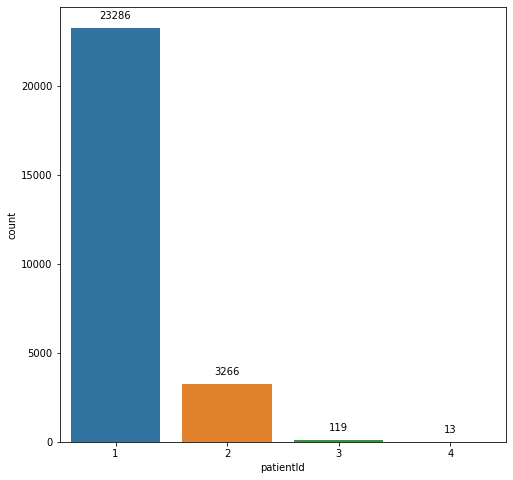

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
x=combined_df['patientId'].value_counts()
fig = plt.figure(figsize=(8,8))
splot=sns.countplot(x)
for p in splot.patches:
   splot.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 12), textcoords = 'offset points')

### Exploring more about the Attribute : 'class'

No Lung Opacity / Not Normal    11821
Lung Opacity                     9555
Normal                           8851
Name: class, dtype: int64

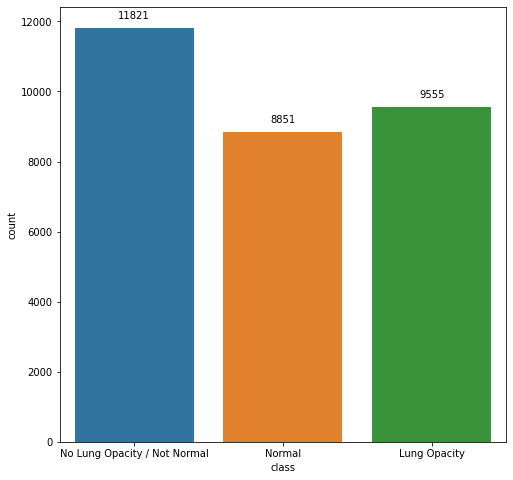

In [0]:
fig = plt.figure(figsize=(8,8))
splot=sns.countplot(combined_df['class'])
for p in splot.patches:
   splot.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 12), textcoords = 'offset points')
combined_df['class'].value_counts()

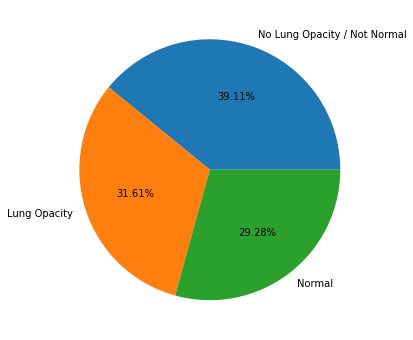

In [0]:
# Distribution of classes
fig = plt.figure(figsize=(6,6))
values = combined_df['class'].value_counts().keys().tolist()
counts = combined_df['class'].value_counts().tolist()
plt.pie(counts, labels=values, autopct="%.2f%%")
plt.show()

### Exploring more about the Attribute : 'Target'

0    20672
1     9555
Name: Target, dtype: int64

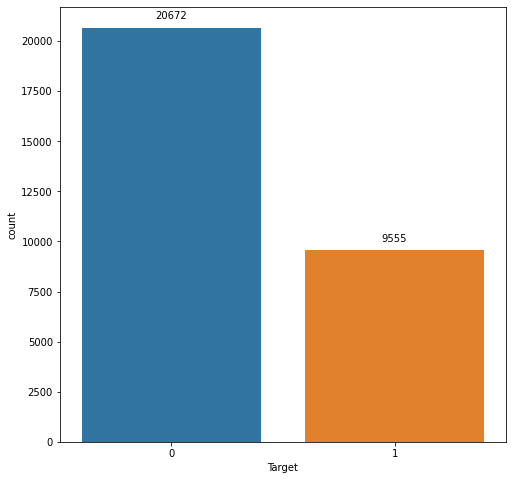

In [0]:
fig = plt.figure(figsize=(8,8))
splot=sns.countplot(combined_df['Target'])
for p in splot.patches:
   splot.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 12), textcoords = 'offset points')
combined_df['Target'].value_counts()

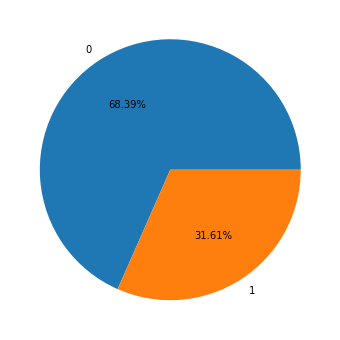

In [0]:
# Distribution of Target
fig = plt.figure(figsize=(6,6))
values = combined_df['Target'].value_counts().keys().tolist()
counts = combined_df['Target'].value_counts().tolist()
plt.pie(counts, labels=values, autopct="%.2f%%")
plt.show()

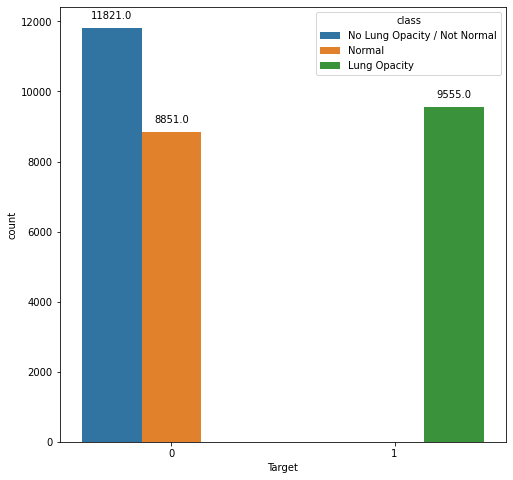

In [0]:
fig = plt.figure(figsize=(8,8))
splot=sns.countplot(x='Target', hue='class',data=combined_df)
for p in splot.patches:
   splot.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 12), textcoords = 'offset points')

In [0]:
# Findings:
# -------
# Target0 --> Has two classes (No Lung Opacity/Not Normal, Normal)
# Target1 --> Has only one class (Lung Opacity)

### Analyzing the target attributes separately

#### Target0

In [0]:
import copy
Target_0 = copy.deepcopy(combined_df[combined_df['Target'] == 0])
Target_0.head()

,patientId,class,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal,NaN,NaN,NaN,NaN,0
6,00569f44-917d-4c86-a842-81832af98c30,No Lung Opacity / Not Normal,NaN,NaN,NaN,NaN,0


In [0]:
Target_0.shape

(20672, 7)

In [0]:
Target_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20672 entries, 0 to 30224
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   patientId  20672 non-null  object 
 1   class      20672 non-null  object 
 2   x          0 non-null      float64
 3   y          0 non-null      float64
 4   width      0 non-null      float64
 5   height     0 non-null      float64
 6   Target     20672 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 1.3+ MB


In [0]:
Target_0.isnull().sum()  #Checking for null values

patientId        0
class            0
x            20672
y            20672
width        20672
height       20672
Target           0
dtype: int64

No Lung Opacity / Not Normal    11821
Normal                           8851
Name: class, dtype: int64

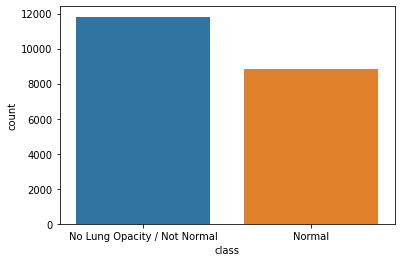

In [0]:
count_value=sns.countplot(Target_0['class'])
Target_0['class'].value_counts()

In [0]:
Target_0['patientId'].value_counts()

de2b54b9-114f-4f68-9a5f-4602e843cc31    1
b6503833-91b2-460a-857a-b4921da4b68e    1
43614f7e-c741-455c-99fe-e5960b87c9d2    1
54807679-7768-48a7-afe1-00f751c713f7    1
678b3367-ee1c-4f3a-9482-58224ad16bc5    1
                                       ..
5fabbfac-9c58-4fb1-bfee-979526adcc14    1
6532bb94-e270-48be-bbb8-6e527de0300e    1
6b3aabe3-7a8f-43dd-bc7d-09e653f56c69    1
e13755c6-5d92-460b-acbe-5bafc5d401b0    1
472688c0-2bd6-4fa3-b2ee-56b441e5cb35    1
Name: patientId, Length: 20672, dtype: int64

In [0]:
Target_0['patientId'].nunique()

20672

In [0]:
# Findings from Target=0
# ----------------------
# x,y,width and height is NaN when Target=0.
# No.of informations is 20672 and no.of unique patientId is 20672
# So each patientId contains a single information

#### Target1

In [0]:
Target_1 = copy.deepcopy(combined_df[combined_df['Target'] == 1])
Target_1.head()

,patientId,class,x,y,width,height,Target
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity,264.0,152.0,213.0,379.0,1
5,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity,562.0,152.0,256.0,453.0,1
8,00704310-78a8-4b38-8475-49f4573b2dbb,Lung Opacity,323.0,577.0,160.0,104.0,1
9,00704310-78a8-4b38-8475-49f4573b2dbb,Lung Opacity,695.0,575.0,162.0,137.0,1
14,00aecb01-a116-45a2-956c-08d2fa55433f,Lung Opacity,288.0,322.0,94.0,135.0,1


In [0]:
Target_1.shape

(9555, 7)

In [0]:
Target_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9555 entries, 4 to 30226
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   patientId  9555 non-null   object 
 1   class      9555 non-null   object 
 2   x          9555 non-null   float64
 3   y          9555 non-null   float64
 4   width      9555 non-null   float64
 5   height     9555 non-null   float64
 6   Target     9555 non-null   int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 597.2+ KB


In [0]:
Target_1.isnull().sum()  #Checking for null values

patientId    0
class        0
x            0
y            0
width        0
height       0
Target       0
dtype: int64

Lung Opacity    9555
Name: class, dtype: int64

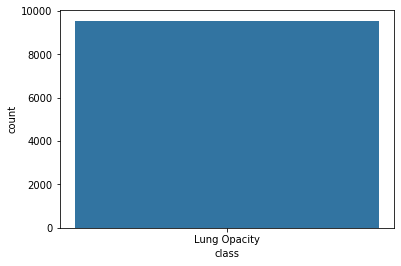

In [0]:
count_value=sns.countplot(Target_1['class'])
Target_1['class'].value_counts()

In [0]:
Target_1['patientId'].value_counts()

0e03c2d7-9cea-4dc7-8e91-794a8b3ff58d    4
349f10b4-dc3e-4f3f-b2e4-a5b81448ce87    4
1c44e0a4-4612-438f-9a83-8d5bf919cb67    4
0d5bc737-03de-4bb8-98a1-45b7180c3e0f    4
8dc8e54b-5b05-4dac-80b9-fa48878621e2    4
                                       ..
b086dfcf-4704-41a5-bdf7-22139c5d0711    1
0637b804-e693-48d1-8716-f7c63ce6162a    1
b4857f8b-e6af-44da-84d3-ba3608ca7cb2    1
594df72e-4237-41a1-8712-73f91c596cb4    1
af335d18-feec-4942-9831-3e25ca20e7e3    1
Name: patientId, Length: 6012, dtype: int64

In [0]:
Target_1['patientId'].nunique()

6012

In [0]:
# Findings from Target=1
# ----------------------
# No null values are observed
# No. of informations provided for Target=1 is 9555, but no.of unique patientId is 6012.
# So a single patientId contains more than 1 information.

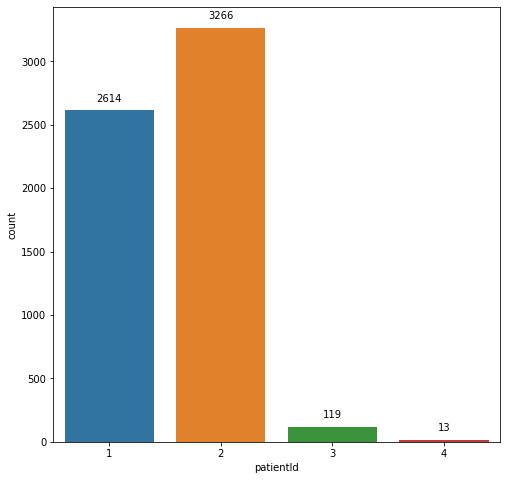

In [0]:
x=Target_1['patientId'].value_counts()
fig = plt.figure(figsize=(8,8))
splot=sns.countplot(x)
for p in splot.patches:
   splot.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 12), textcoords = 'offset points')

### Visualizing the images ( With bounding box if Target =1)

In [0]:
project_path= project_path+'/stage_2_train_images'
project_path

'/content/drive/My Drive/Capstone_Project/Data/stage_2_train_images'

In [0]:
os.chdir(project_path)
!pwd

/content/drive/My Drive/Capstone_Project/Data/stage_2_train_images


In [0]:
pip install pydicom

     |████████████████████████████████| 35.3MB 1.2MB/s 


In [0]:
import pydicom
import numpy as np
import matplotlib.patches as patches
from matplotlib.patches import Rectangle

In [0]:
items = os.listdir(project_path)

In [0]:
project_path

'/content/drive/My Drive/Capstone_Project/Data/stage_2_train_images'

In [0]:
image_number=9
print(items[image_number])
head, sep, tail = items[image_number].partition('.')
print(head)
bounding_box = combined_df[combined_df['patientId']==str(head)]
bounding_box

f7909c0c-c9f0-4c93-be7f-113926850ac3.dcm
f7909c0c-c9f0-4c93-be7f-113926850ac3


,patientId,class,x,y,width,height,Target
27909,f7909c0c-c9f0-4c93-be7f-113926850ac3,No Lung Opacity / Not Normal,NaN,NaN,NaN,NaN,0


In [0]:
full_path= project_path +'/'+ items[image_number]
full_path

'/content/drive/My Drive/Capstone_Project/Data/stage_2_train_images/f7909c0c-c9f0-4c93-be7f-113926850ac3.dcm'

Shape of the image : (1024, 1024)


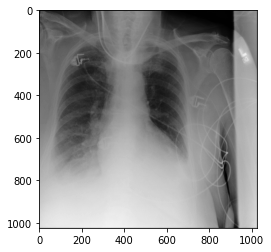

In [0]:
cxr_image = pydicom.read_file(full_path)
cxr_image_new=cxr_image.pixel_array
plt.imshow(cxr_image_new, cmap='gray')
for i in range (len(bounding_box)):
  plt.gca().add_patch(Rectangle((bounding_box['x'].values[i],bounding_box['y'].values[i]),bounding_box['width'].values[i],bounding_box['height'].values[i],linewidth=1,edgecolor='r',facecolor='none'))

print('Shape of the image :', cxr_image_new.shape)
plt.show()

In [0]:
cxr_image

(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.24506.1517874454.871180
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time                          TM: '000000.00'
(0008, 0050) Accession Number                    SH: ''
(0008, 0060) Modality                            CS: 'CR'
(0008, 0064) Conversion Type                     CS: 'WSD'
(0008, 0090) Referring Physician's Name          PN: ''
(0008, 103e) Series Description                  LO: 'view: AP'
(0010, 0010) Patient's Name                      PN: 'f7909c0c-c9f0-4c93-be7f-113926850ac3'
(0010, 0020) Patient ID                          LO: 'f7909c0c-c9f0-4c93-be7f-113926850ac3'
(0010, 0030) Patient's Birth Date                DA: ''
(0010, 0040) Patient's Sex                       CS: 'F'
(0010, 1010) Patient'

In [0]:
cxr_image.dir()

['AccessionNumber',
 'BitsAllocated',
 'BitsStored',
 'BodyPartExamined',
 'Columns',
 'ConversionType',
 'HighBit',
 'InstanceNumber',
 'LossyImageCompression',
 'LossyImageCompressionMethod',
 'Modality',
 'PatientAge',
 'PatientBirthDate',
 'PatientID',
 'PatientName',
 'PatientOrientation',
 'PatientSex',
 'PhotometricInterpretation',
 'PixelData',
 'PixelRepresentation',
 'PixelSpacing',
 'ReferringPhysicianName',
 'Rows',
 'SOPClassUID',
 'SOPInstanceUID',
 'SamplesPerPixel',
 'SeriesDescription',
 'SeriesInstanceUID',
 'SeriesNumber',
 'SpecificCharacterSet',
 'StudyDate',
 'StudyID',
 'StudyInstanceUID',
 'StudyTime',
 'ViewPosition']

In [0]:
print('Size :', cxr_image.Rows, cxr_image.Columns)

Size : 1024 1024


Checking the size of all the training images

In [0]:
cxr_path=[]
for each_image in items:
  if each_image.endswith(".dcm"):
    full_path= project_path +'/'+ each_image
    cxr_path.append(full_path)

In [0]:
shape_of_image=[]
for i in range (len(cxr_path)):
  cxr_image = pydicom.read_file(full_path)
  cxr_image_new=cxr_image.pixel_array
  shape_of_image.append(cxr_image_new.shape)

In [0]:
shape_of_image

[(1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 10

Checking the size of all the testing images

In [0]:
project_path='/content/drive/My Drive/Capstone_Project/stage_2_test_images'

In [0]:
project_path

'/content/drive/My Drive/Capstone_Project/stage_2_test_images'

In [0]:
os.chdir(project_path)

In [0]:
items = os.listdir(project_path)

In [0]:
cxr_path_test=[]
for each_image in items:
  if each_image.endswith(".dcm"):
    full_path_test= project_path +'/'+ each_image
    cxr_path_test.append(full_path_test)

In [0]:
shape_of_image_test=[]
for i in range (len(cxr_path_test)):
  cxr_image_test = pydicom.read_file(full_path_test)
  cxr_image_new_test=cxr_image_test.pixel_array
  shape_of_image_test.append(cxr_image_new_test.shape)
  #print('Shape of the image :', cxr_image_new.shape)

In [0]:
shape_of_image_test

[(1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 1024),
 (1024, 10

In [0]:
# Findings:
# ---------
# The given image is a gray scale image
# All the given images are of equal size (1024,1024)

### Extracting information from the Metadata 

In [0]:
pip install pydicom

     |████████████████████████████████| 35.3MB 119kB/s 


In [0]:
import pandas as pd 
import numpy as np
import os
import glob
import pylab
import pydicom 
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns
%matplotlib inline 

In [0]:
project_path = '/content/drive/My Drive/Capstone_Project/Data/stage_2_train_images'
os.chdir(project_path)
images_path = os.listdir(project_path)

In [0]:
metadata_Patient_ID=[]
metadata_Patient_Sex=[]
metadata_Patient_Age=[]
metadata_View_Position=[]
metadata_Study_Date=[]
for n, image in enumerate(images_path):
        ds = pydicom.dcmread(os.path.join(project_path, image))
        metadata_Patient_ID.append(ds.PatientID)
        metadata_Patient_Sex.append(ds.PatientSex)
        metadata_Patient_Age.append(ds.PatientAge)
        metadata_View_Position.append(ds.ViewPosition) 
        metadata_Study_Date.append(ds.StudyDate)       
        if n % 200 == 0:
          print('{} image information extracted'.format(n))

0 image information extracted
200 image information extracted
400 image information extracted
600 image information extracted
800 image information extracted
1000 image information extracted
1200 image information extracted
1400 image information extracted
1600 image information extracted
1800 image information extracted
2000 image information extracted
2200 image information extracted
2400 image information extracted
2600 image information extracted
2800 image information extracted
3000 image information extracted
3200 image information extracted
3400 image information extracted
3600 image information extracted
3800 image information extracted
4000 image information extracted
4200 image information extracted
4400 image information extracted
4600 image information extracted
4800 image information extracted
5000 image information extracted
5200 image information extracted
5400 image information extracted
5600 image information extracted
5800 image information extracted
6000 image inform

In [0]:
metadata_df = pd.DataFrame(list(zip(metadata_Patient_ID, metadata_Patient_Sex, metadata_Patient_Age, metadata_View_Position,metadata_Study_Date)), 
               columns =['patientId', 'Sex', 'Age', 'Position', 'Date']) 
metadata_df 

,patientId,Sex,Age,Position,Date
0,f7a37b72-fda5-4adc-b3b0-968c923bc1c6,F,35,PA,19010101
1,f78f155c-0caf-466b-ae36-1f365861b01d,M,33,PA,19010101
2,f77b0afe-0085-4ee0-afad-a1e9fda8fe65,F,29,AP,19010101
3,f760c946-a103-4991-a6e5-ff60c24cd99f,M,46,AP,19010101
4,f6f6cb82-f83b-4abd-88b1-4ad5e9436bfd,F,38,PA,19010101
...,...,...,...,...,...
26679,095aecad-1618-4b23-b7b9-342c25c4666b,M,40,PA,19010101
26680,090abf67-66f4-413b-ac4a-bfad36e07e1a,F,31,AP,19010101
26681,094eed38-9c5b-4042-936d-344ccec4c3cc,F,65,AP,19010101
26682,091e90d0-bdb7-4815-935f-5b52b93ddbe6,F,45,PA,19010101


In [0]:
metadata_df.to_csv(r'/content/drive/My Drive/Capstone_Project/Data/MetaData_information.csv', index=False) 

In [0]:
project_path='/content/drive/My Drive/Capstone_Project/Data'
os.chdir(project_path)

In [0]:
meta_dataframe=pd.read_csv("MetaData_information.csv")

In [0]:
meta_dataframe

,patientId,Sex,Age,Position,Date
0,f7a37b72-fda5-4adc-b3b0-968c923bc1c6,F,35,PA,19010101
1,f78f155c-0caf-466b-ae36-1f365861b01d,M,33,PA,19010101
2,f77b0afe-0085-4ee0-afad-a1e9fda8fe65,F,29,AP,19010101
3,f760c946-a103-4991-a6e5-ff60c24cd99f,M,46,AP,19010101
4,f6f6cb82-f83b-4abd-88b1-4ad5e9436bfd,F,38,PA,19010101
...,...,...,...,...,...
26679,095aecad-1618-4b23-b7b9-342c25c4666b,M,40,PA,19010101
26680,090abf67-66f4-413b-ac4a-bfad36e07e1a,F,31,AP,19010101
26681,094eed38-9c5b-4042-936d-344ccec4c3cc,F,65,AP,19010101
26682,091e90d0-bdb7-4815-935f-5b52b93ddbe6,F,45,PA,19010101


In [0]:
print('No. of unique patient Id in the dataframe2 :',meta_dataframe['patientId'].nunique())

No. of unique patient Id in the dataframe2 : 26684


In [0]:
# No. of unique patient id is 26684 and no.of metatdata information is 26684
# So multiple cxr images were not taken for a single person.
# So ignoring the study time and proceeding further

In [0]:
meta_dataframe = meta_dataframe.drop(['Date'], axis = 1).copy()

In [0]:
meta_dataframe.head()

,patientId,Sex,Age,Position
0,f7a37b72-fda5-4adc-b3b0-968c923bc1c6,F,35,PA
1,f78f155c-0caf-466b-ae36-1f365861b01d,M,33,PA
2,f77b0afe-0085-4ee0-afad-a1e9fda8fe65,F,29,AP
3,f760c946-a103-4991-a6e5-ff60c24cd99f,M,46,AP
4,f6f6cb82-f83b-4abd-88b1-4ad5e9436bfd,F,38,PA


### Merging the given csv file with the metadata information

In [0]:
dataframe1=pd.read_csv("stage_2_detailed_class_info.csv")
dataframe2=pd.read_csv("stage_2_train_labels.csv")

In [0]:
dataframe1.set_index("patientId", inplace = True)
dataframe2.set_index("patientId", inplace = True)
combined_df = pd.concat([dataframe1, dataframe2], axis=1, join='inner')
combined_df.reset_index(inplace=True)
combined_df

,patientId,class,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity,264.0,152.0,213.0,379.0,1
...,...,...,...,...,...,...,...
30222,c1ec14ff-f6d7-4b38-b0cb-fe07041cbdc8,Lung Opacity,185.0,298.0,228.0,379.0,1
30223,c1edf42b-5958-47ff-a1e7-4f23d99583ba,Normal,NaN,NaN,NaN,NaN,0
30224,c1f6b555-2eb1-4231-98f6-50a963976431,Normal,NaN,NaN,NaN,NaN,0
30225,c1f7889a-9ea9-4acb-b64c-b737c929599a,Lung Opacity,570.0,393.0,261.0,345.0,1


In [0]:
combined_df = combined_df.drop(['x','y','width', 'height'], axis = 1).copy()

In [0]:
combined_df = combined_df.drop_duplicates()
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26684 entries, 0 to 30225
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   patientId  26684 non-null  object
 1   class      26684 non-null  object
 2   Target     26684 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 833.9+ KB


In [0]:
combined_df.set_index("patientId", inplace = True)
meta_dataframe.set_index("patientId", inplace = True)
final_meta_data = pd.concat([combined_df,meta_dataframe], axis=1, join='inner')
final_meta_data.reset_index(inplace=True)
final_meta_data

,patientId,class,Target,Sex,Age,Position
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal,0,F,51,PA
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal,0,F,48,PA
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal,0,M,19,AP
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal,0,M,28,PA
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity,1,F,32,AP
...,...,...,...,...,...,...
26679,c1e73a4e-7afe-4ec5-8af6-ce8315d7a2f2,Lung Opacity,1,F,47,AP
26680,c1ec14ff-f6d7-4b38-b0cb-fe07041cbdc8,Lung Opacity,1,M,54,AP
26681,c1edf42b-5958-47ff-a1e7-4f23d99583ba,Normal,0,F,46,PA
26682,c1f6b555-2eb1-4231-98f6-50a963976431,Normal,0,M,45,PA


In [0]:
final_meta_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26684 entries, 0 to 26683
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   patientId  26684 non-null  object
 1   class      26684 non-null  object
 2   Target     26684 non-null  int64 
 3   Sex        26684 non-null  object
 4   Age        26684 non-null  int64 
 5   Position   26684 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.2+ MB


In [0]:
final_meta_data['class'] = final_meta_data['class'].astype('category')
final_meta_data['Sex'] = final_meta_data['Sex'].astype('category')
final_meta_data['Position'] = final_meta_data['Position'].astype('category')

In [0]:
final_meta_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26684 entries, 0 to 26683
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   patientId  26684 non-null  object  
 1   class      26684 non-null  category
 2   Target     26684 non-null  int64   
 3   Sex        26684 non-null  category
 4   Age        26684 non-null  int64   
 5   Position   26684 non-null  category
dtypes: category(3), int64(2), object(1)
memory usage: 704.0+ KB


### Exploring the attribute "class" from the metadata

No Lung Opacity / Not Normal    11821
Normal                           8851
Lung Opacity                     6012
Name: class, dtype: int64

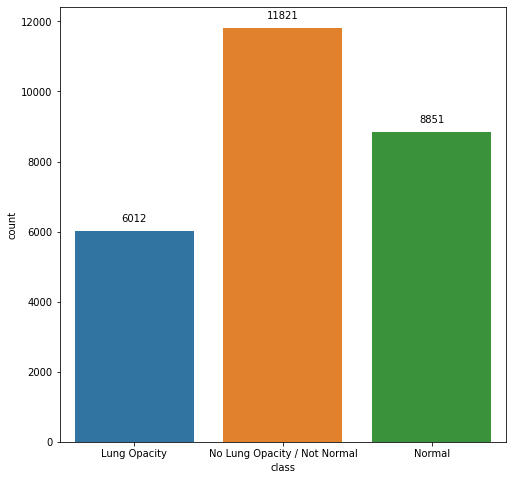

In [0]:
fig = plt.figure(figsize=(8,8))
splot=sns.countplot(final_meta_data['class'])
for p in splot.patches:
   splot.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 12), textcoords = 'offset points')
final_meta_data['class'].value_counts()

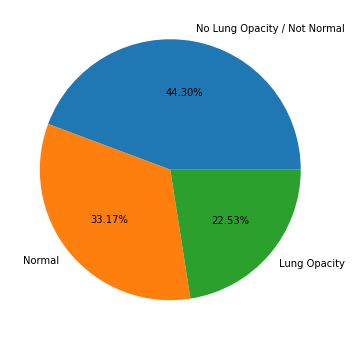

In [0]:
# Distribution of classes
fig = plt.figure(figsize=(6,6))
values = final_meta_data['class'].value_counts().keys().tolist()
counts = final_meta_data['class'].value_counts().tolist()
plt.pie(counts, labels=values, autopct="%.2f%%")
plt.show()

### Exploring the attribute "target" from the metadata

0    20672
1     6012
Name: Target, dtype: int64

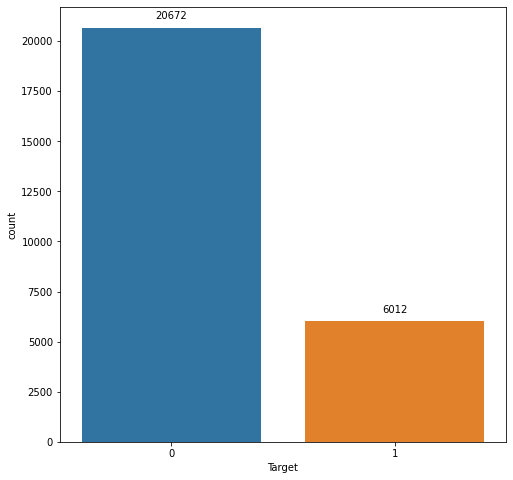

In [0]:
fig = plt.figure(figsize=(8,8))
splot=sns.countplot(final_meta_data['Target'])
for p in splot.patches:
   splot.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 12), textcoords = 'offset points')
final_meta_data['Target'].value_counts()

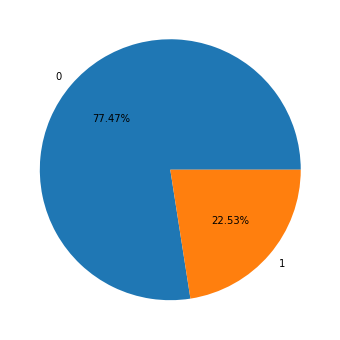

In [0]:
# Distribution of target
fig = plt.figure(figsize=(6,6))
values = final_meta_data['Target'].value_counts().keys().tolist()
counts = final_meta_data['Target'].value_counts().tolist()
plt.pie(counts, labels=values, autopct="%.2f%%")
plt.show()

### Relationship between "Target" and "class"

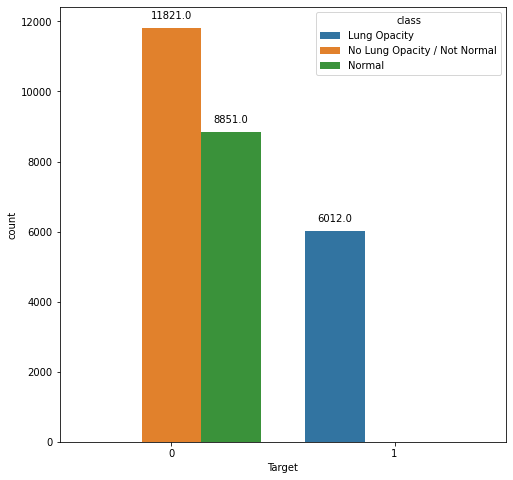

In [0]:
fig = plt.figure(figsize=(8,8))
splot=sns.countplot(x='Target', hue='class',data=final_meta_data)
for p in splot.patches:
   splot.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 12), textcoords = 'offset points')

### Distribution of "Age"

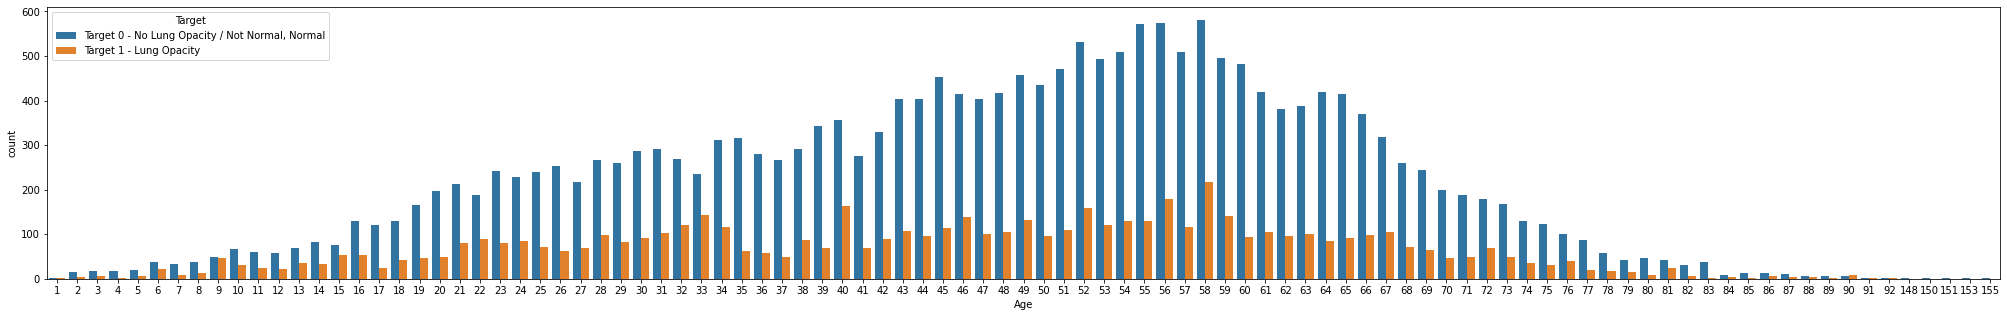

In [0]:
plt.figure(figsize = (35, 5))
sns.countplot(x = 'Age', hue = 'Target', data = final_meta_data);
plt.legend(title='Target', loc='upper left', labels=['Target 0 - No Lung Opacity / Not Normal, Normal', 'Target 1 - Lung Opacity'])
plt.show()

In [0]:
final_meta_data['age_category'] = (final_meta_data['Age'] // 10) * 10

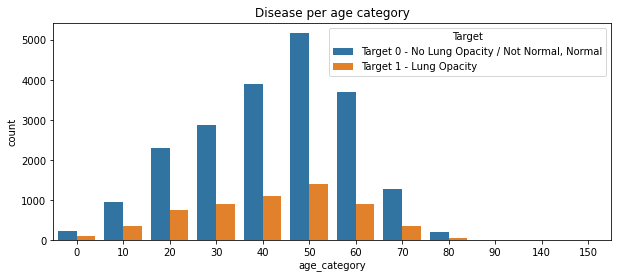

In [0]:
plt.figure(figsize = (10, 4))
sns.countplot(x="age_category", hue="Target", data=final_meta_data)
plt.title('Disease per age category')
plt.legend(title='Target', loc='upper right', labels=['Target 0 - No Lung Opacity / Not Normal, Normal', 'Target 1 - Lung Opacity'])
plt.show()

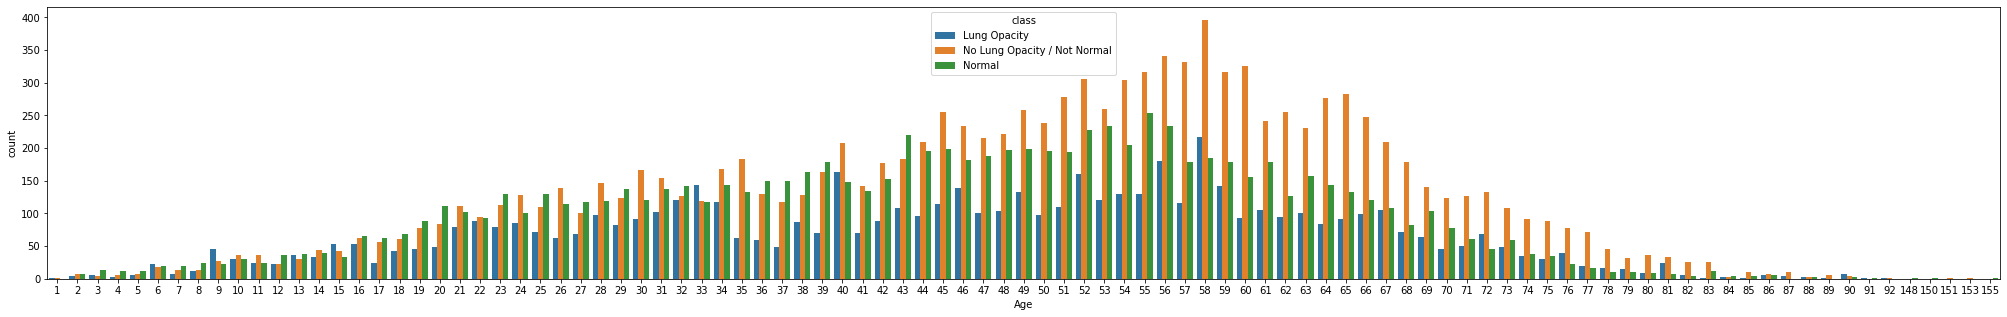

In [0]:
plt.figure(figsize = (35, 5))
sns.countplot(x = 'Age', hue = 'class', data = final_meta_data);
plt.show()

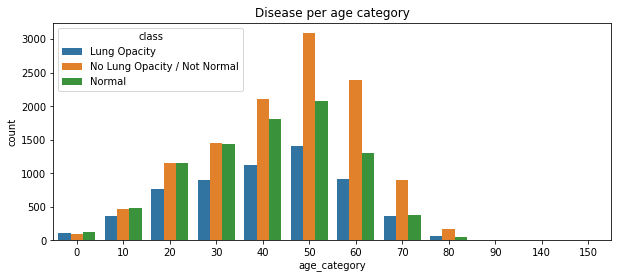

In [0]:
plt.figure(figsize = (10, 4))
sns.countplot(x="age_category", hue="class", data=final_meta_data)
plt.title('Disease per age category')
plt.show()

In [0]:
# Finding:
# -------
# Most of the given cxr images falls between the ages 40 to 55.

In [0]:
final_meta_data = final_meta_data.drop(['age_category'], axis = 1).copy()

### Distribution of "Sex:

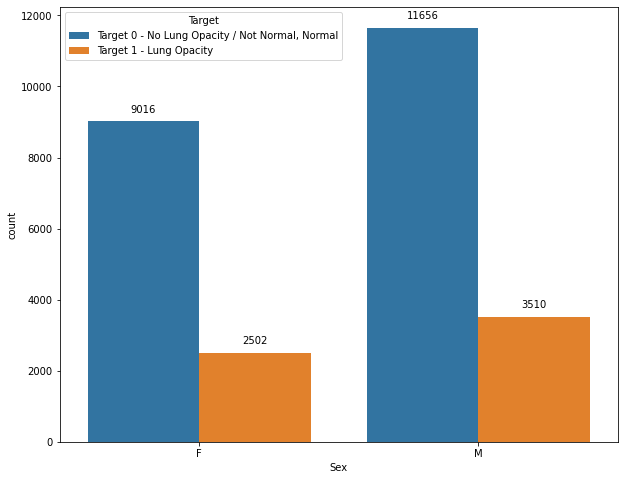

In [0]:
fig = plt.figure(figsize=(10,8))
splot=sns.countplot(x = 'Sex', hue = 'Target', data = final_meta_data);
for p in splot.patches:
   splot.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 12), textcoords = 'offset points')
plt.legend(title='Target', loc='upper left', labels=['Target 0 - No Lung Opacity / Not Normal, Normal', 'Target 1 - Lung Opacity'])
plt.show()

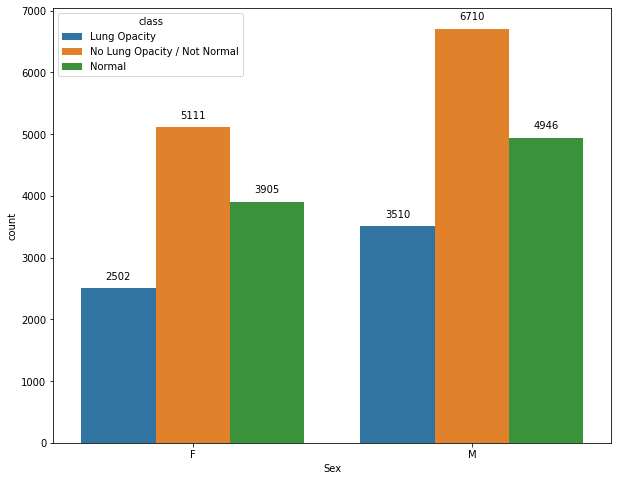

In [0]:
fig = plt.figure(figsize=(10,8))
splot=sns.countplot(x = 'Sex', hue = 'class', data = final_meta_data);
for p in splot.patches:
   splot.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 12), textcoords = 'offset points')

### Distribution of "Position"

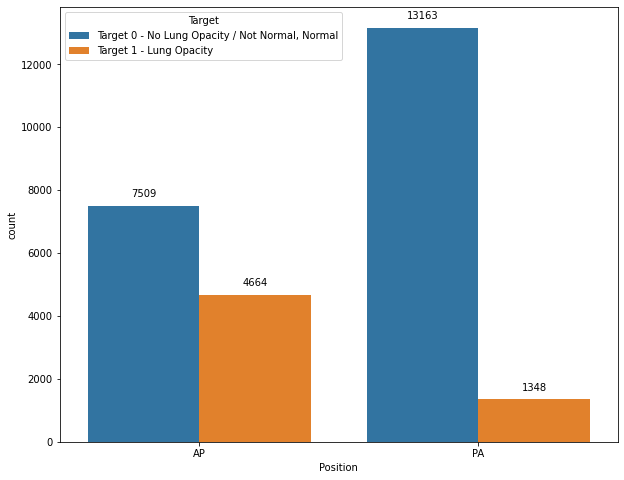

In [0]:
fig = plt.figure(figsize=(10,8))
splot=sns.countplot(x = 'Position', hue = 'Target', data = final_meta_data);
for p in splot.patches:
   splot.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 12), textcoords = 'offset points')
plt.legend(title='Target', loc='upper left', labels=['Target 0 - No Lung Opacity / Not Normal, Normal', 'Target 1 - Lung Opacity'])
plt.show()

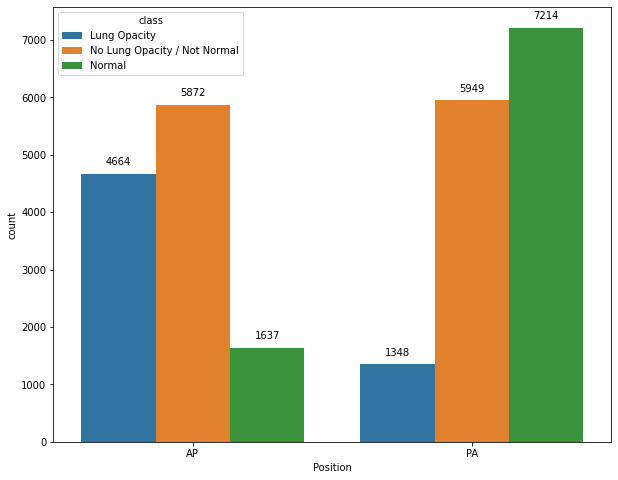

In [0]:
fig = plt.figure(figsize=(10,8))
splot=sns.countplot(x = 'Position', hue = 'class', data = final_meta_data);
for p in splot.patches:
   splot.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 12), textcoords = 'offset points')
plt.show()

### Co-orelation

In [0]:
final_meta_data['Sex'] = final_meta_data['Sex'].map({'F': 0, 'M': 1})
final_meta_data['Position'] = final_meta_data['Position'].map({'PA': 0, 'AP': 1})
final_meta_data['class'] = final_meta_data['class'].map({'Lung Opacity': 0, 'No Lung Opacity / Not Normal': 1, 'Normal': 2})

In [0]:
final_meta_data['Sex'] = final_meta_data['Sex'].astype('int')
final_meta_data['Position'] = final_meta_data['Position'].astype('int')
final_meta_data['class'] = final_meta_data['class'].astype('int')

In [0]:
corr = final_meta_data.corr()
corr

,class,Target,Sex,Age,Position
class,1.000000,-0.807715,-0.018187,-0.029643,-0.440231
Target,-0.807715,1.000000,0.016851,-0.046437,0.346032
Sex,-0.018187,0.016851,1.000000,-0.001923,0.019354
Age,-0.029643,-0.046437,-0.001923,1.000000,-0.051792
Position,-0.440231,0.346032,0.019354,-0.051792,1.000000


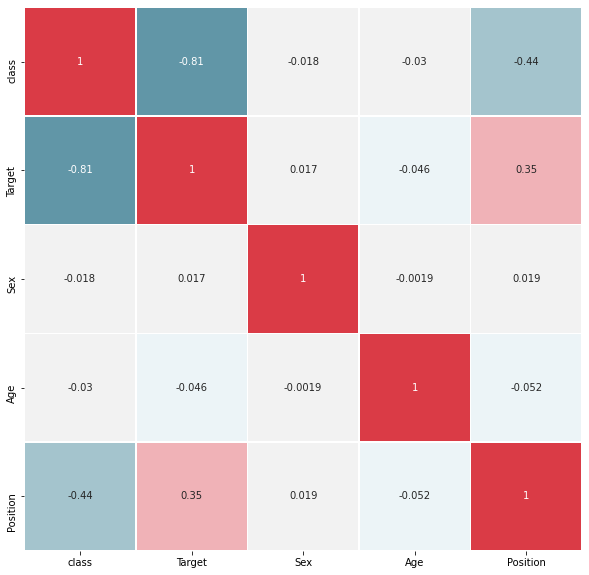

In [0]:
plt.figure(figsize=(10,10))
sns.heatmap(final_meta_data.corr(), annot=True, linewidths=.5,center=0,cbar=False,cmap=sns.diverging_palette(220, 10, as_cmap=True))
plt.show()

### Visualizing the images for both Target=0 and Target=1

In [0]:
project_path='/content/drive/My Drive/Capstone_Project/Data'
os.chdir(project_path)

In [0]:
import pandas as pd
dataframe1=pd.read_csv("stage_2_detailed_class_info.csv")
dataframe2=pd.read_csv("stage_2_train_labels.csv")

In [0]:
dataframe1.set_index("patientId", inplace = True)
dataframe2.set_index("patientId", inplace = True)
combined_df = pd.concat([dataframe1, dataframe2], axis=1, join='inner')
combined_df.reset_index(inplace=True)
combined_df

,patientId,class,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity,264.0,152.0,213.0,379.0,1
...,...,...,...,...,...,...,...
30222,c1ec14ff-f6d7-4b38-b0cb-fe07041cbdc8,Lung Opacity,185.0,298.0,228.0,379.0,1
30223,c1edf42b-5958-47ff-a1e7-4f23d99583ba,Normal,NaN,NaN,NaN,NaN,0
30224,c1f6b555-2eb1-4231-98f6-50a963976431,Normal,NaN,NaN,NaN,NaN,0
30225,c1f7889a-9ea9-4acb-b64c-b737c929599a,Lung Opacity,570.0,393.0,261.0,345.0,1


In [0]:
def show_dicom_images(data):
    img_data = list(data.T.to_dict().values())
    f, ax = plt.subplots(3,3, figsize=(16,18))
    for i,data_row in enumerate(img_data):
        patientImage = data_row['patientId']+'.dcm'
        imagePath = '/content/drive/My Drive/Capstone_Project/Data/stage_2_train_images/'+patientImage #os.path.join(proj_Path,"/Data/stage_2_train_images/",patientImage)
        data_row_img_data = pydicom.read_file(imagePath)
        modality = data_row_img_data.Modality
        age = data_row_img_data.PatientAge
        sex = data_row_img_data.PatientSex
        data_row_img = pydicom.dcmread(imagePath)
        ax[i//3, i%3].imshow(data_row_img.pixel_array, cmap=plt.cm.bone) 
        ax[i//3, i%3].axis('off')
        ax[i//3, i%3].set_title('ID: {}\nModality: {} Age: {} Sex: {} Target: {}\nClass: {}\nWindow: {}:{}:{}:{}'.format(
                data_row['patientId'],
                modality, age, sex, data_row['Target'], data_row['class'], 
                data_row['x'],data_row['y'],data_row['width'],data_row['height']))
    plt.show()

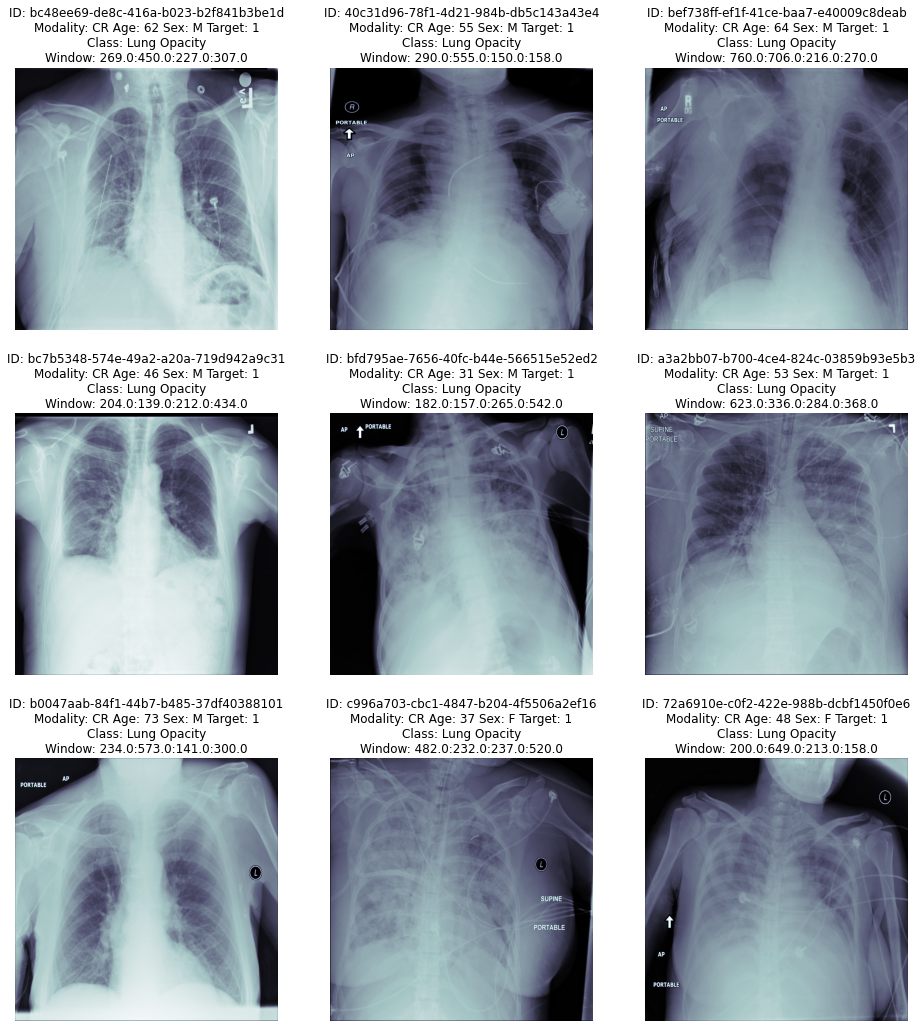

In [0]:
show_dicom_images(combined_df[combined_df['Target']==1].sample(9))

In [0]:
def show_dicom_images_with_boxes(data):
    img_data = list(data.T.to_dict().values())
    f, ax = plt.subplots(3,3, figsize=(16,18))
    for i,data_row in enumerate(img_data):
        patientImage = data_row['patientId']+'.dcm'
        imagePath = '/content/drive/My Drive/Capstone_Project/Data/stage_2_train_images/'+patientImage
        data_row_img_data = pydicom.read_file(imagePath)
        modality = data_row_img_data.Modality
        age = data_row_img_data.PatientAge
        sex = data_row_img_data.PatientSex
        data_row_img = pydicom.dcmread(imagePath)
        ax[i//3, i%3].imshow(data_row_img.pixel_array, cmap=plt.cm.bone) 
        ax[i//3, i%3].axis('off')
        ax[i//3, i%3].set_title('ID: {}\nModality: {} Age: {} Sex: {} Target: {}\nClass: {}'.format(
                data_row['patientId'],modality, age, sex, data_row['Target'], data_row['class']))
        rows = combined_df[combined_df['patientId']==data_row['patientId']]
        box_data = list(rows.T.to_dict().values())
        for j, row in enumerate(box_data):
            ax[i//3, i%3].add_patch(Rectangle(xy=(row['x'], row['y']),
                        width=row['width'],height=row['height'], 
                        linewidth=5,edgecolor='r',facecolor='yellow',alpha = 0.1))   
    plt.show()

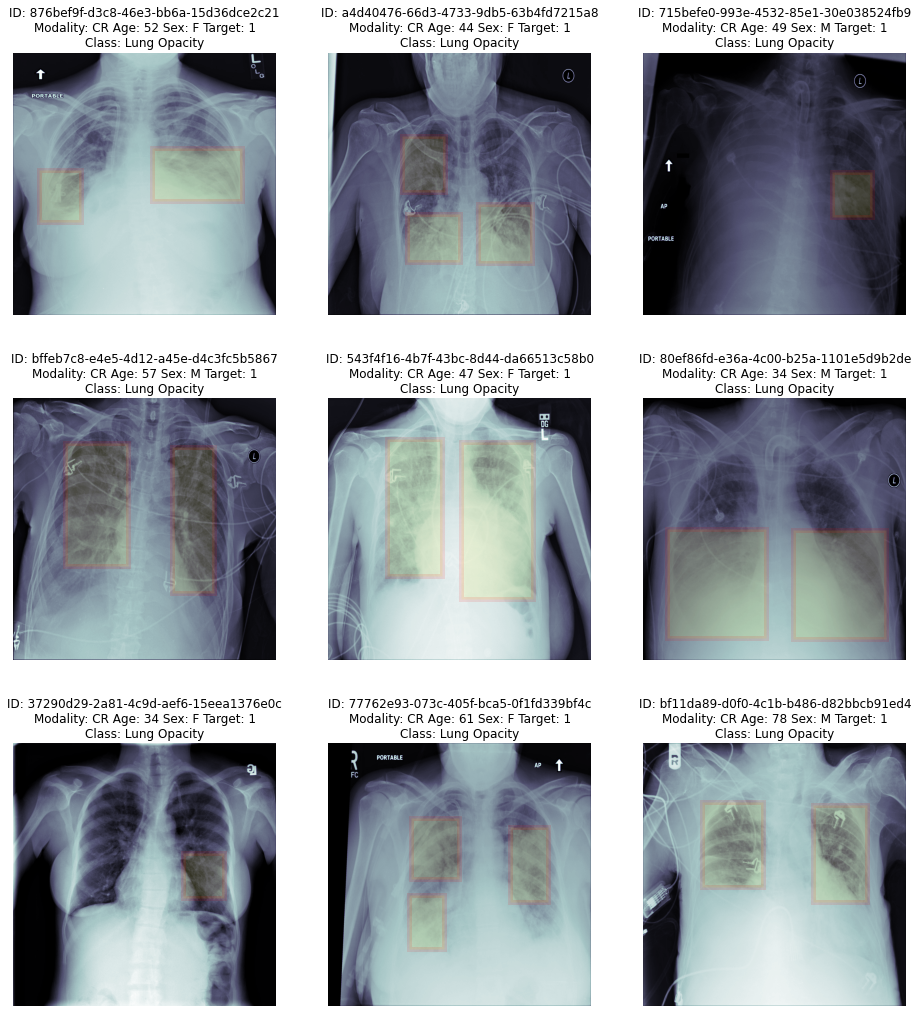

In [0]:
show_dicom_images_with_boxes(combined_df[combined_df['Target']==1].sample(9))

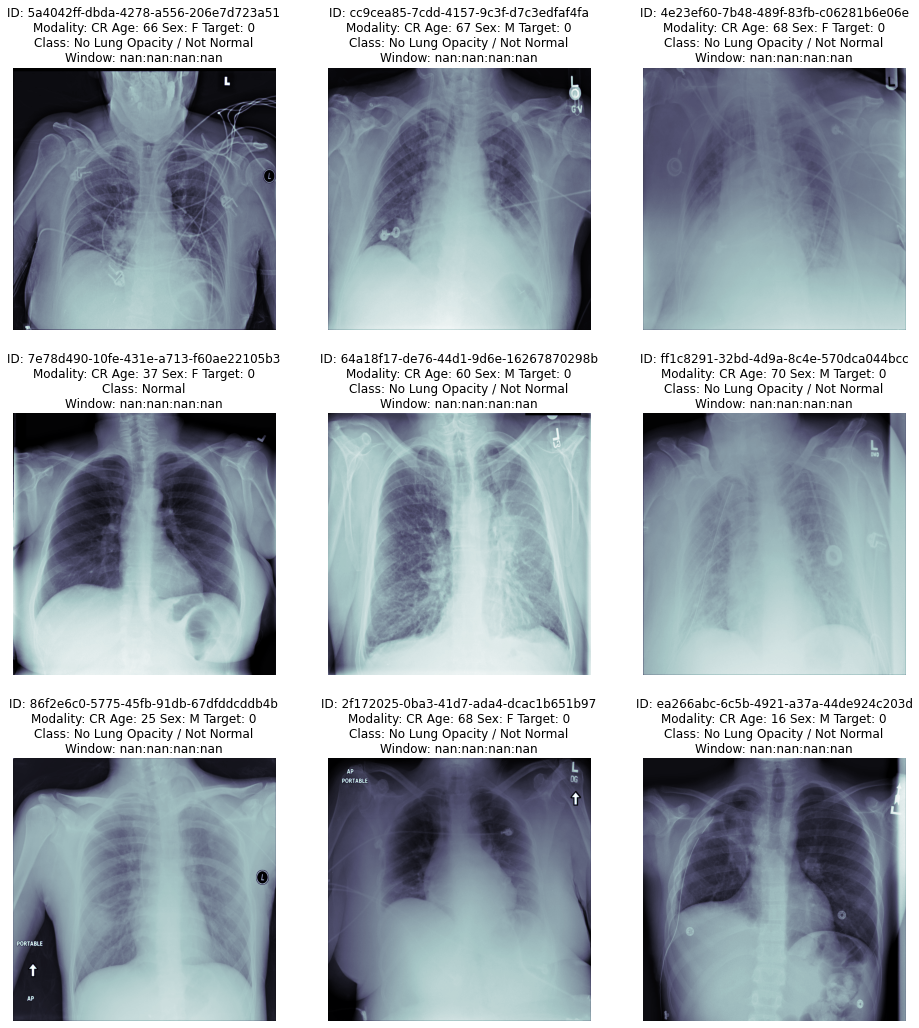

In [0]:
show_dicom_images(combined_df[combined_df['Target']==0].sample(9))